In [1]:
!pip install --upgrade tensorflow==1.15

  Using cached https://files.pythonhosted.org/packages/92/2b/e3af15221da9ff323521565fa3324b0d7c7c5b1d7a8ca66984c8d59cb0ce/tensorflow-1.15.0-cp37-cp37m-manylinux2010_x86_64.whl
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.15.0 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
layer = {
    'input': 1,
    'output': 1
}

batch_size = 10
time_step = 20
epoch = 5000

In [4]:
def load_dataset():
  dataset = pd.read_csv("avocado_sorted.csv", index_col = 'Date')
  dataset.index = pd.to_datetime(dataset.index)
  return dataset

In [5]:
def get_batch(dataset, time_step, batch_size):
  input_batch = np.zeros(shape = (batch_size, time_step, layer['input']))
  output_batch = np.zeros(shape = (batch_size, time_step, layer['output']))

  for i in range(batch_size):
    point = np.random.randint(0, len(dataset) - time_step)
    input_batch += dataset[point : point+time_step]
    output_batch += dataset[point+1 : point+time_step+1]
  
  return input_batch, output_batch

In [6]:
dataset = load_dataset()
dataset

,Unnamed: 0,AveragePrice
Date,,
1980-01-01,0,1.75
1980-02-01,1,1.49
1980-03-01,2,1.68
1980-04-01,3,1.52
1980-05-01,4,1.64
...,...,...
2019-08-01,475,1.76
2019-09-01,476,1.44
2019-10-01,477,0.85


In [7]:
dataset = dataset.drop(['Unnamed: 0'],axis='columns')

In [8]:
dataset

,AveragePrice
Date,
1980-01-01,1.75
1980-02-01,1.49
1980-03-01,1.68
1980-04-01,1.52
1980-05-01,1.64
...,...
2019-08-01,1.76
2019-09-01,1.44
2019-10-01,0.85


In [9]:
split = int(len(dataset) * 0.8)
train_dataset = dataset[:split]
test_dataset = dataset[split:]

In [10]:
scaler = MinMaxScaler().fit(train_dataset)
normalize_train_dataset = scaler.transform(train_dataset)

In [11]:
cell = tf.nn.rnn_cell.BasicRNNCell(100, activation = tf.nn.sigmoid)
cell = tf.contrib.rnn.OutputProjectionWrapper(cell, layer['output'], activation = tf.nn.sigmoid)

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [12]:
input_feature = tf.placeholder(tf.float32, [None, time_step, layer['input']])
input_target = tf.placeholder(tf.float32, [None, time_step, layer['output']])

In [13]:
output, _ = tf.nn.dynamic_rnn(cell, input_feature, dtype = tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
loss = tf.reduce_mean(0.5 * (input_target - output) ** 2)
train = tf.train.AdamOptimizer(0.0001).minimize(loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
saver = tf.train.Saver()

In [16]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  for i in range(1, epoch+1):
    input_batch, output_batch = get_batch(normalize_train_dataset, time_step, batch_size)

    feed = {
        input_feature: input_batch,
        input_target: output_batch
    }

    sess.run(train, feed_dict = feed)

    if(i % 200 == 0):
      print("Iteration {} = Loss: {}".format(i, sess.run(loss, feed_dict = feed)))

  saver.save(sess, './rnn-model.ckpt')

Iteration 200 = Loss: 5.186817169189453
Iteration 400 = Loss: 5.1870903968811035
Iteration 600 = Loss: 5.252785682678223
Iteration 800 = Loss: 5.944411754608154
Iteration 1000 = Loss: 5.158840179443359
Iteration 1200 = Loss: 5.49354362487793
Iteration 1400 = Loss: 5.991805553436279
Iteration 1600 = Loss: 6.047616004943848
Iteration 1800 = Loss: 5.885820388793945
Iteration 2000 = Loss: 4.980059623718262
Iteration 2200 = Loss: 5.221006870269775
Iteration 2400 = Loss: 6.19430685043335
Iteration 2600 = Loss: 6.767443656921387
Iteration 2800 = Loss: 5.367033004760742
Iteration 3000 = Loss: 5.6220383644104
Iteration 3200 = Loss: 6.041574478149414
Iteration 3400 = Loss: 5.991304874420166
Iteration 3600 = Loss: 5.543622970581055
Iteration 3800 = Loss: 5.509212493896484
Iteration 4000 = Loss: 5.262209415435791
Iteration 4200 = Loss: 6.572458267211914
Iteration 4400 = Loss: 5.308441162109375
Iteration 4600 = Loss: 5.649683952331543
Iteration 4800 = Loss: 5.497539043426514
Iteration 5000 = Loss: 

INFO:tensorflow:Restoring parameters from ./rnn-model.ckpt
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)
(1, 20, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


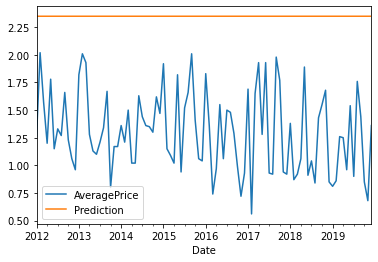

In [18]:
with tf.Session() as sess:
    seed_data = list(normalize_train_dataset)
    saver.restore(sess, './rnn-model.ckpt')

    for i in range(len(test_dataset)):
        input_batch = np.array(seed_data[-time_step:]).reshape(1, time_step, layer['input'])
        print(input_batch.shape)
        feed = {
            input_feature: input_batch
        }
        predict = sess.run(output, feed_dict = feed)
        seed_data.append(predict[0, -1, 0])

    predict_result = scaler.inverse_transform(np.array(seed_data[-len(test_dataset):]).reshape([len(test_dataset), 1]))
    test_dataset["Prediction"] = predict_result
    test_dataset.plot()
    plt.show()